In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv('/content/portfolio_data.csv')

In [6]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [7]:
df.index

RangeIndex(start=0, stop=1520, step=1)

In [ ]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [9]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [10]:
df.size

7600

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [12]:
np.unique(df['AMZN'])

array([ 248.229996,  252.550003,  255.720001, ..., 2012.709961,
       2012.97998 , 2039.51001 ])

In [13]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


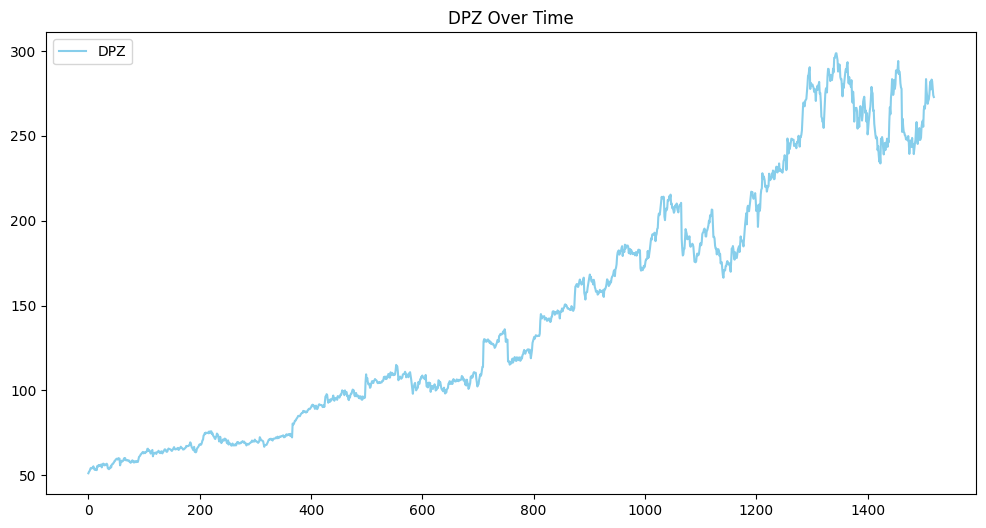

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DPZ'], label='DPZ', color='skyblue')
plt.title('DPZ Over Time')
plt.legend()
plt.grid(False)
plt.show()

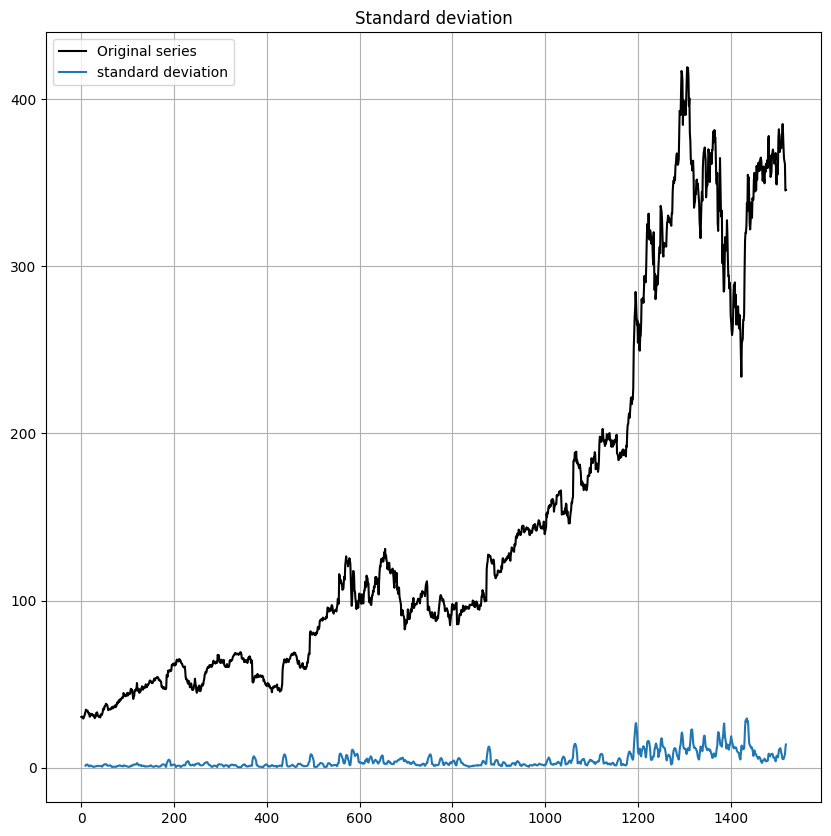

In [39]:
rolling_std = df["NFLX"].rolling(10).std()
plt.figure(figsize=(10,10))
plt.plot(df["NFLX"], color="black", label="Original series")
plt.plot(rolling_std, label="standard deviation")
plt.legend(loc="best")
plt.title("Standard deviation")
plt.grid(True)
plt.show()

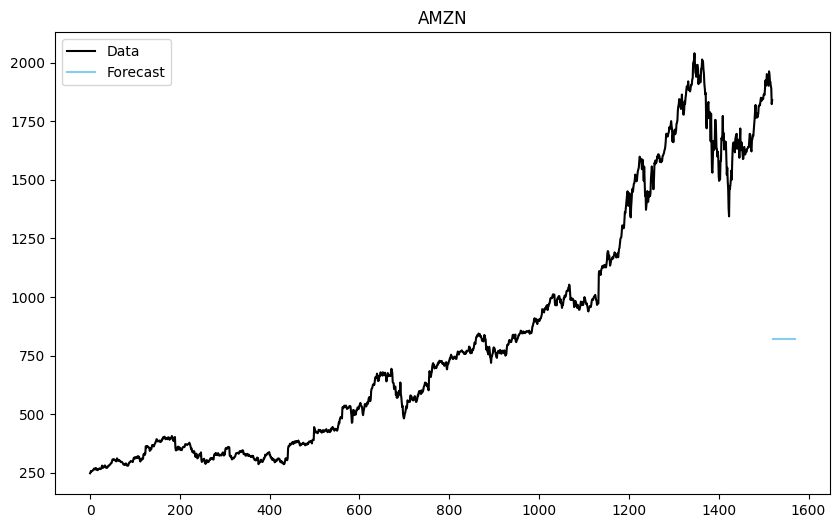

In [32]:
model = ARIMA(df["AMZN"])
fit_model = model.fit()
forecast = fit_model.get_forecast(steps=50)
plt.figure(figsize=(10,6))
plt.plot(df["AMZN"], label= "Data", color="black")
plt.plot(forecast.predicted_mean, label ="Forecast", color="skyblue")
plt.title("AMZN")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

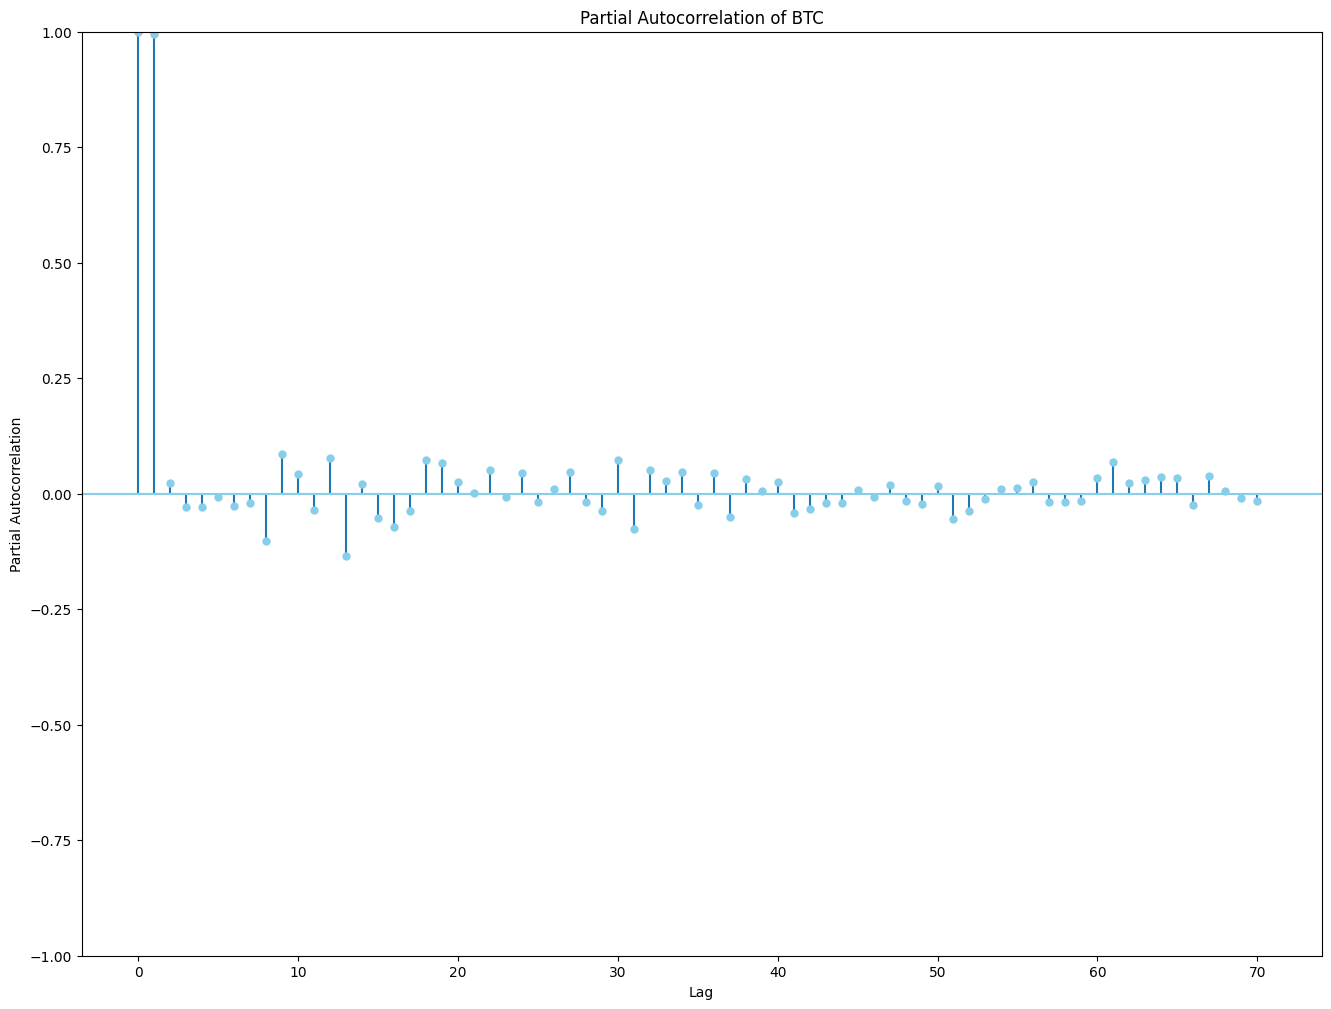

In [36]:
plt.figure(figsize=(10,6))
plot_pacf(df['BTC'], lags=70, alpha =1, color="skyblue")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation of BTC")
plt.show()


<Figure size 1200x200 with 0 Axes>

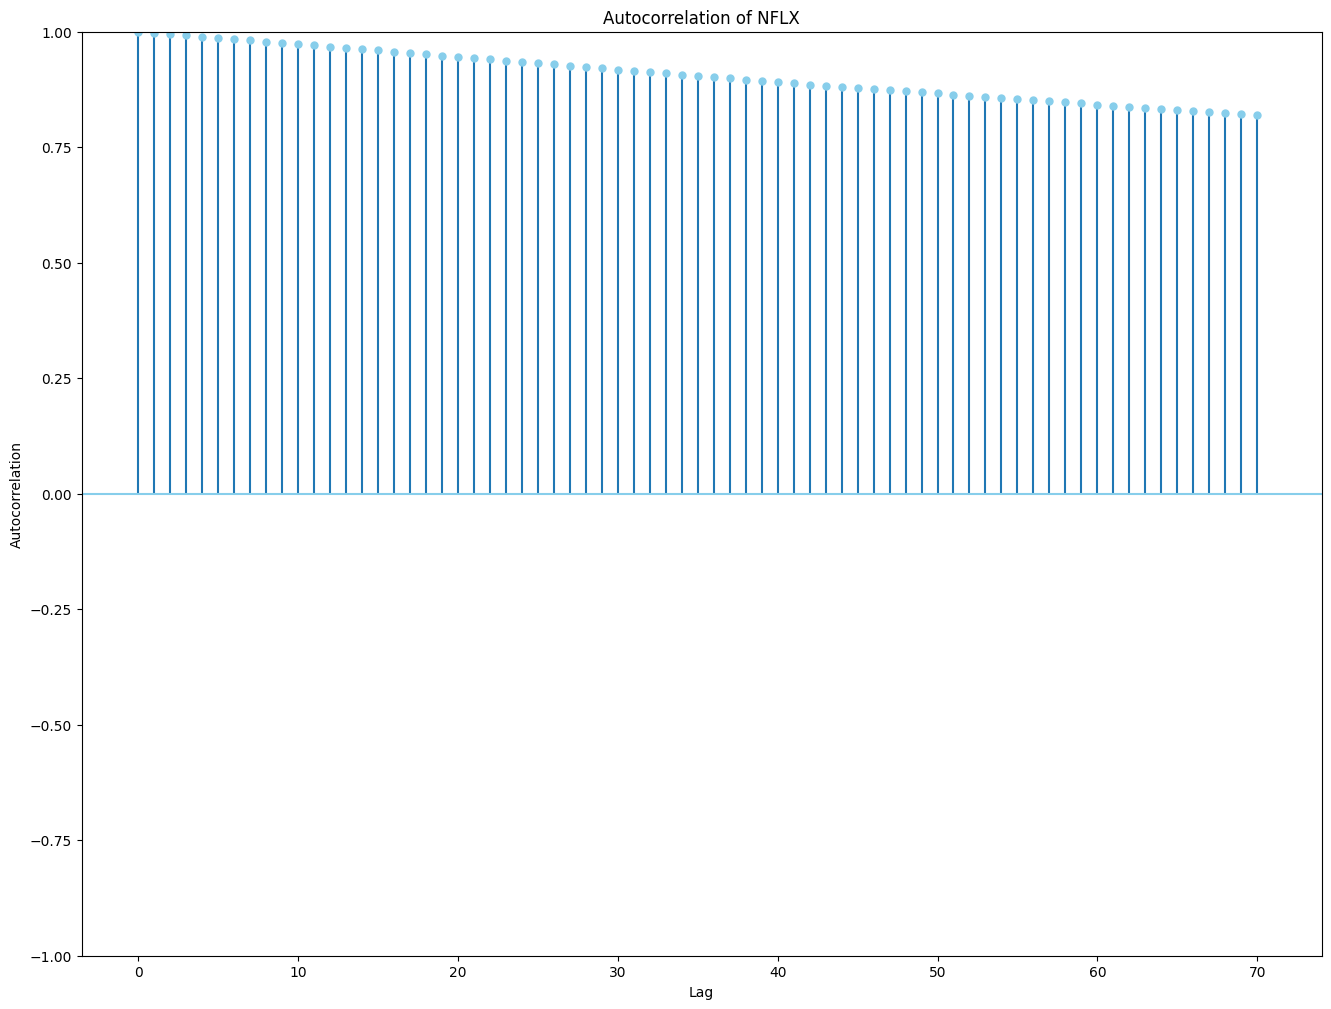

In [37]:
plt.figure(figsize=(12,2))
plot_acf(df['NFLX'], lags=70, alpha =1, color="skyblue")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of NFLX")
plt.show()

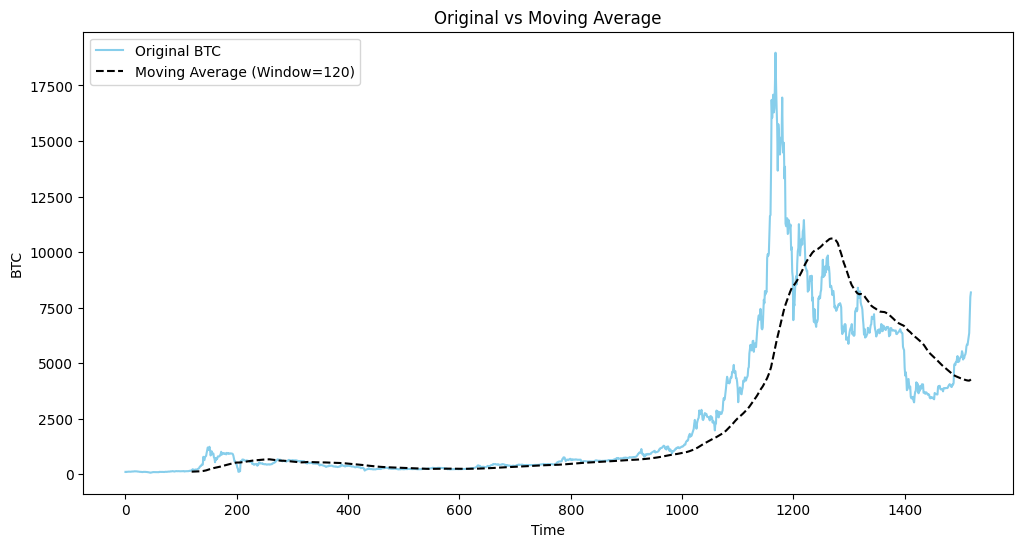

In [20]:
window_size = 120
df['BTC_smoothed'] = df['BTC'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['BTC'], label='Original BTC', color='skyblue')
plt.plot(df['BTC_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='black')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

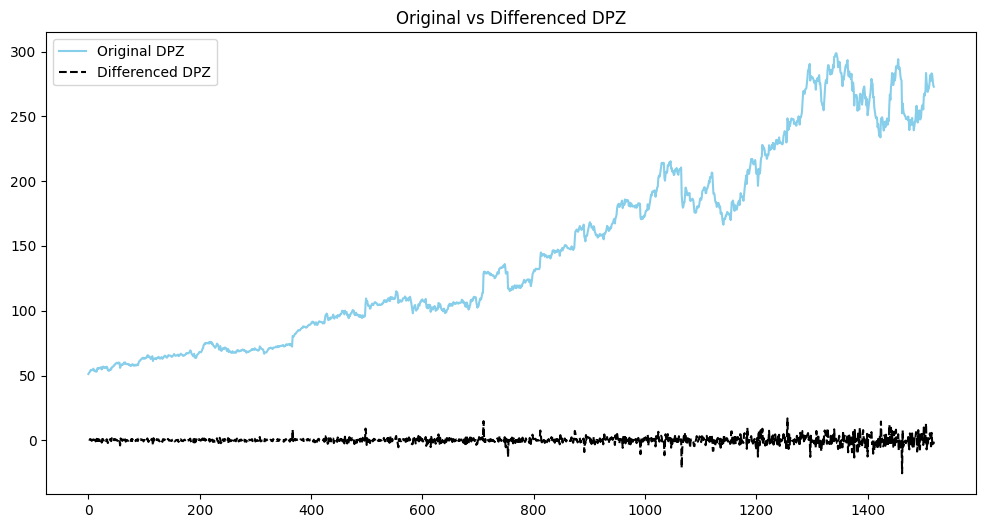

In [22]:
df['DPZ_diff'] = df['DPZ'].diff()
plt.figure(figsize=(12, 6))
plt.plot(df['DPZ'], label='Original DPZ', color='skyblue')
plt.plot(df['DPZ_diff'], label='Differenced DPZ', linestyle='--', color='black')
plt.legend()
plt.title('Original vs Differenced DPZ')
plt.show()

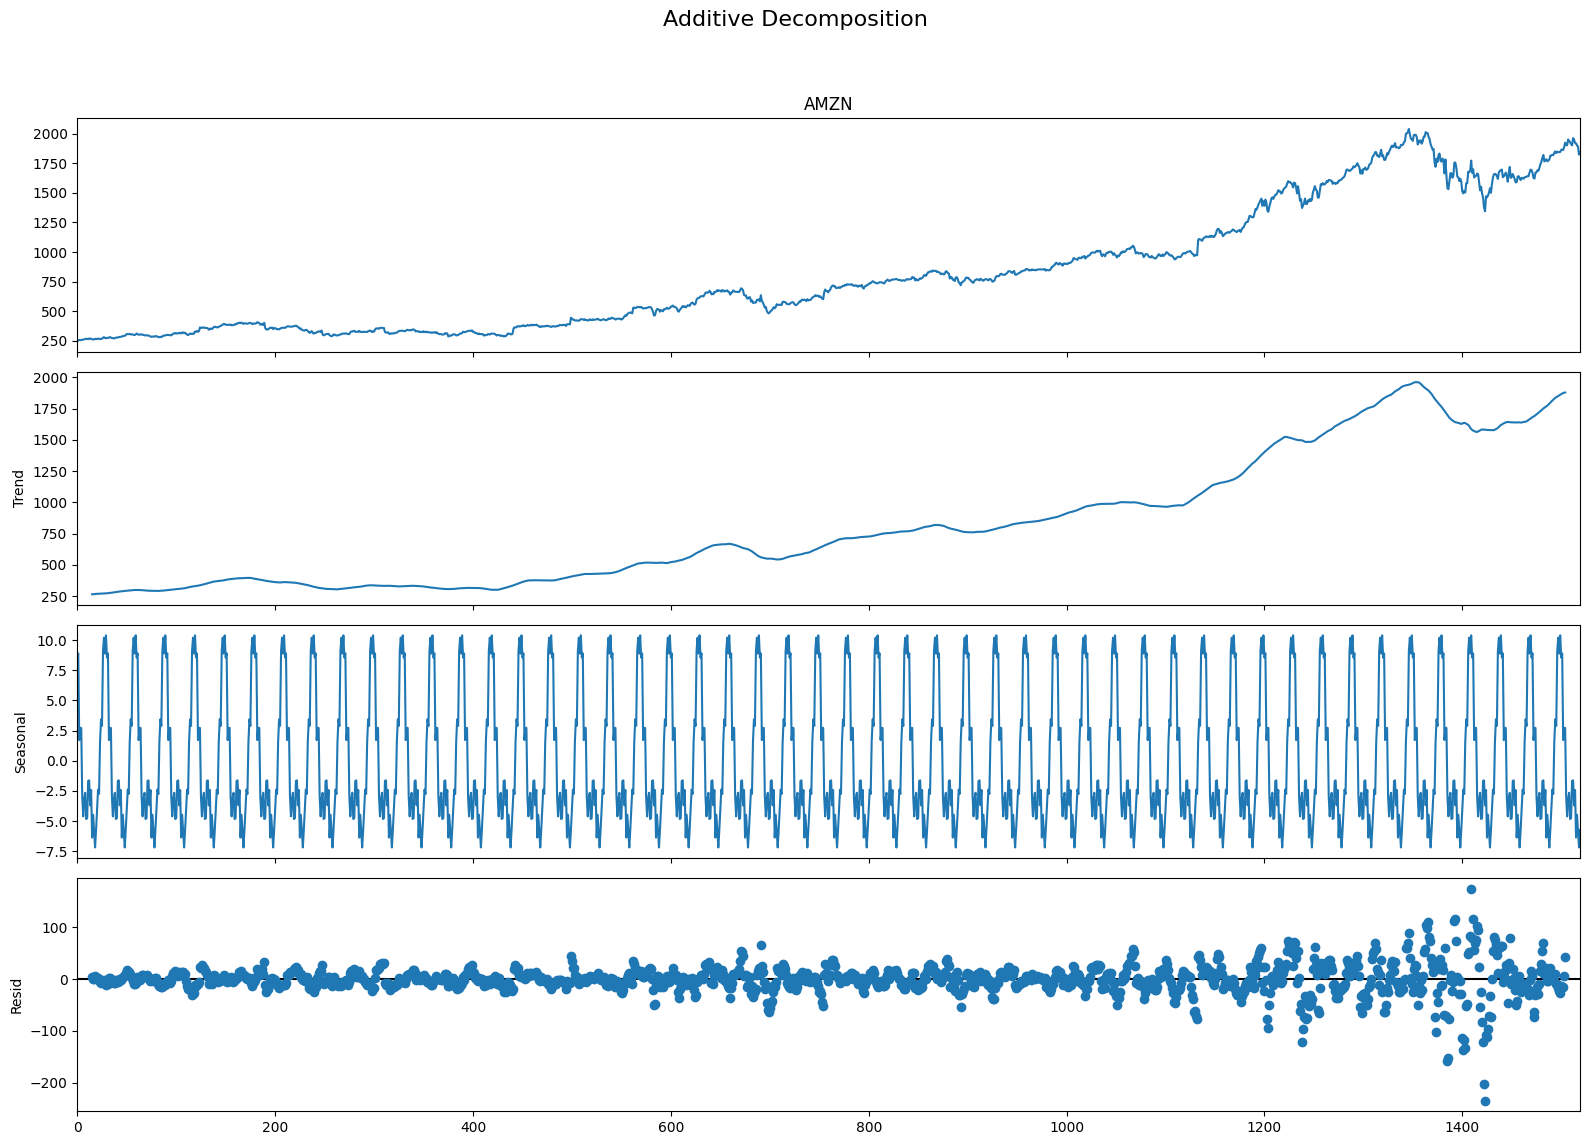

In [29]:
additive_decomposition = seasonal_decompose(df['AMZN'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

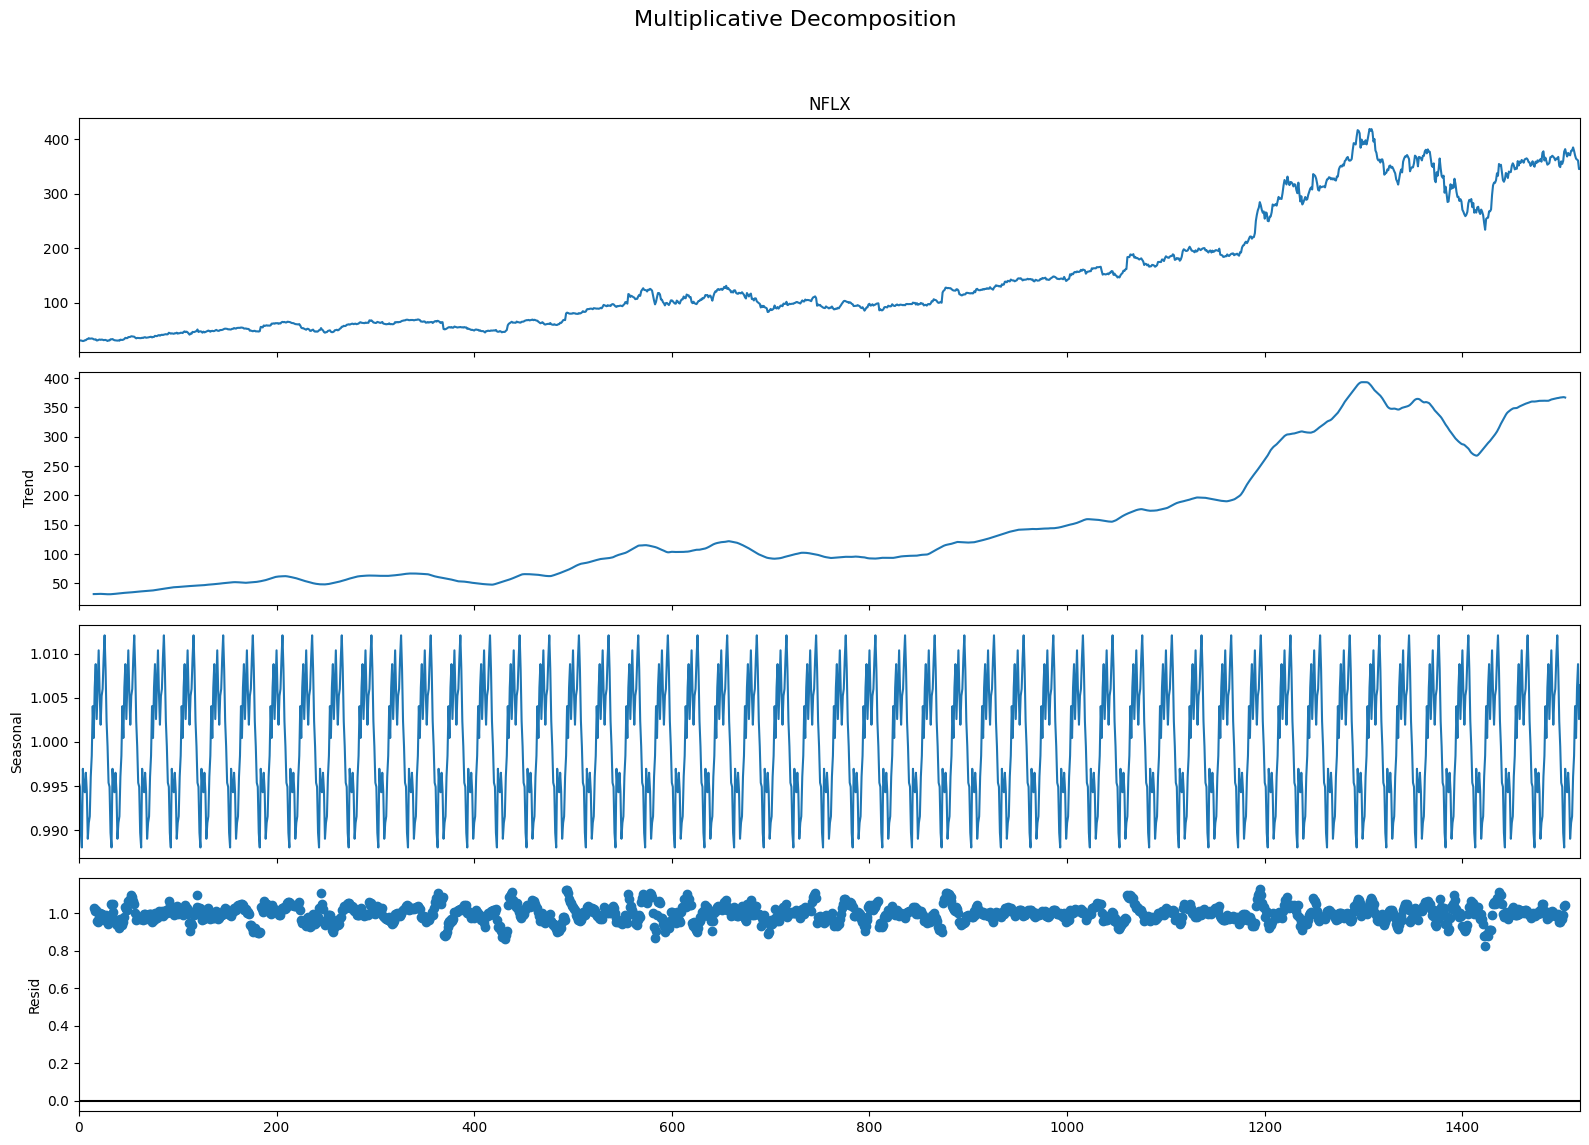

In [28]:
multiplicative_decomposition = seasonal_decompose(df['NFLX'], model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()